In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import random
import numpy as np

In [2]:
eicu2 = pd.read_csv('smooth_bp_eicu2.csv')
SAL = pd.read_csv('salzburg.csv')

In [3]:
unique_eicu = eicu2['unittype_x'].unique()
unique_eicu

array(['Med-Surg ICU', 'CTICU', 'Neuro ICU', 'CSICU', 'MICU',
       'Cardiac ICU', 'CCU-CTICU', 'SICU'], dtype=object)

In [4]:
MICU = eicu2[eicu2['unittype_x'] == 'MICU']
SICU = eicu2[eicu2['unittype_x'] == 'SICU']
MED = eicu2[eicu2['unittype_x'] == 'Med-Surg ICU']


In [5]:
micu_first_target_df = MICU[(MICU['cur_bp'] >= 60) & (MICU['cur_bp'] <= 70)]
sicu_first_target_df = SICU[(SICU['cur_bp'] >= 60) & (SICU['cur_bp'] <= 70)]
med_first_target_df = MED[(MED['cur_bp'] >= 60) & (MED['cur_bp'] <= 70)]
sal_first_target_df = SAL[(SAL['cur_bp'] >= 60) & (SAL['cur_bp'] <= 70)]
eicu_target = eicu2[(eicu2['cur_bp'] >= 60) & (eicu2['cur_bp'] <= 70)]

micu_first_target_dict = micu_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sicu_first_target_dict = sicu_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
med_first_target_dict = med_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sal_first_target_dict = sal_first_target_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
eicu_target_dict = eicu_target.groupby('stay_id')['cur_bp_time'].first().to_dict()

micu_first_target_dict = {key: value for key, value in micu_first_target_dict.items() if value >= 0}
sicu_first_target_dict = {key: value for key, value in sicu_first_target_dict.items() if value >= 0}
med_first_target_dict = {key: value for key, value in med_first_target_dict.items() if value >= 0}
sal_first_target_dict = {key: value for key, value in sal_first_target_dict.items() if value >= 0}
eicu_target_dict = {key: value for key, value in eicu_target_dict.items() if value >= 0}

In [6]:
len(eicu_target_dict)

1882

In [7]:
med_first_target_dict

{243334: 91,
 243643: 93,
 244256: 234,
 245811: 105,
 248581: 9,
 249329: 189,
 250828: 815,
 251140: 306,
 251194: 179,
 251926: 74,
 252312: 741,
 252473: 69,
 252578: 181,
 252589: 26,
 252776: 102,
 255112: 385,
 255637: 19,
 257212: 113,
 257307: 234,
 257390: 66,
 257535: 82,
 257889: 981,
 257890: 622,
 257891: 138,
 257892: 239,
 258091: 125,
 258884: 86,
 259941: 160,
 260882: 196,
 261844: 277,
 262893: 53,
 263815: 220,
 263855: 172,
 264221: 391,
 264459: 32,
 264849: 37,
 265482: 96,
 267666: 26,
 269084: 222,
 269226: 75,
 269403: 136,
 270217: 133,
 271043: 32,
 272336: 279,
 272551: 134,
 272740: 121,
 273140: 192,
 274461: 276,
 274595: 42,
 275796: 56,
 276614: 95,
 276742: 705,
 276743: 891,
 277354: 137,
 279434: 447,
 279592: 87,
 280288: 152,
 280609: 53,
 280665: 40,
 281697: 471,
 281715: 238,
 285092: 268,
 285366: 160,
 286475: 76,
 286509: 58,
 286678: 251,
 286866: 43,
 287769: 81,
 290250: 122,
 291469: 7,
 292547: 78,
 297131: 116,
 297942: 240,
 298377: 

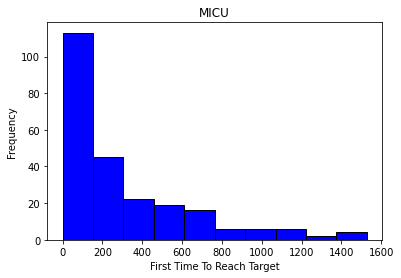

In [8]:
plt.hist(micu_first_target_dict.values(), bins=10, color='blue', edgecolor='black')
plt.xlabel('First Time To Reach Target')
plt.ylabel('Frequency')
plt.title('MICU')
plt.show()


In [9]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability', # Set the bin size to 30

        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('MICU_target.html')
fig.write_image('MICU target.png')



In [10]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),
         histnorm='probability', # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)


fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SICU_target.html')
fig.write_image('SICU target.png')



In [11]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability', # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('MED surg_target.html')
fig.write_image('MED target.png')


In [12]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_target_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        histnorm='probability', # Set the bin size to 30
        xbins=dict(size=30),  # Set the bin size to 30
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='First Time To Reach Target',
    yaxis_title='Frequency',
    title='SICdb distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_html('SAL target.html')
fig.write_image('SAL target.png')


In [13]:
micu_first_target = list(micu_first_target_dict.values())
sicu_first_target = list(sicu_first_target_dict.values())
med_surg_first_target = list(med_first_target_dict.values())
sal_first_target = list(sal_first_target_dict.values())


In [14]:
print("first time to reach target:")
first_target_dict = {"micu": micu_first_target, "sicu": sicu_first_target, "med_surg": med_surg_first_target}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        #if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_target_dict[unit1], first_target_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

first time to reach target:
micu, micu KS pavlue: 1.0
micu, sicu KS pavlue: 0.13913036840070403
micu, med_surg KS pavlue: 0.44935535889873446
sicu, med_surg KS pavlue: 0.02949510113399023


In [15]:
micu_first_nor_time_df = MICU[MICU['drugrate'] > 0]
sicu_first_nor_time_df = SICU[SICU['drugrate'] > 0]
med_first_nor_time_df = MED[MED['drugrate'] > 0]
sal_first_nor_time_df = SAL[SAL['drugrate'] > 0]
eicu_nor_time =  eicu2[eicu2['drugrate'] > 0]


micu_first_nor_time_dict = micu_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sicu_first_nor_time_dict = sicu_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
med_first_nor_time_dict = med_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
sal_first_nor_time_dict = sal_first_nor_time_df.groupby('stay_id')['cur_bp_time'].first().to_dict()
eicu_nor_time_dict = eicu_nor_time.groupby('stay_id')['cur_bp_time'].first().to_dict()


micu_first_nor_time_dict = {key: value for key, value in micu_first_nor_time_dict.items() if value >= 0}
sicu_first_nor_time_dict = {key: value for key, value in sicu_first_nor_time_dict.items() if value >= 0}
med_first_nor_time_dict = {key: value for key, value in med_first_nor_time_dict.items() if value >= 0}
sal_first_nor_time_dict = {key: value for key, value in sal_first_nor_time_dict.items() if value >= 0}
eicu_nor_time_dict = {key: value for key, value in eicu_nor_time_dict.items() if value >= 0}


In [16]:
# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MICU_nor_time.png')
fig.write_html('MICU_nor_time.html')


In [17]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('SICU_nor_time.png')
fig.write_html('SICU_nor_time.html')


In [18]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MED_nor_time.png')
fig.write_html('MED_nor_time.html')


In [19]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_nor_time_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=30),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='Time At First NOR',
    yaxis_title='Frequency',
    title='SICdb distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('SAL_nor_time.png')
fig.write_html('SAL_nor_time.html')


In [20]:
print("time at first NOR:")
first_nor_time_dict = {"micu": list(micu_first_nor_time_dict.values()), "sicu": list(sicu_first_nor_time_dict.values()), "med_surg": list(med_first_nor_time_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_nor_time_dict[unit1], first_nor_time_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

time at first NOR:
micu, sicu KS pavlue: 0.6549829722673094
micu, med_surg KS pavlue: 0.08544804960779584
sicu, med_surg KS pavlue: 0.1621021143008058


In [21]:
micu_first_nor_map_dict = micu_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
sicu_first_nor_map_dict = sicu_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
med_first_nor_map_dict = med_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
sal_first_nor_map_dict = sal_first_nor_time_df.groupby('stay_id')['cur_bp'].first().to_dict()
eicu_nor_map_dict = eicu_nor_time.groupby('stay_id')['cur_bp'].first().to_dict()


In [22]:
eicu_nor_map_dict

{243334: 63.0,
 243643: 101.0,
 244256: 81.0,
 245811: 56.0,
 248581: 71.0,
 251140: 56.0,
 251194: 58.0,
 251926: 42.0,
 252312: 67.0,
 252473: 62.0,
 252578: 63.0,
 252589: 62.0,
 252776: 77.0,
 255637: 55.0,
 257307: 87.0,
 257390: 61.0,
 257535: 73.0,
 257889: 52.0,
 257890: 42.0,
 257891: 87.0,
 257892: 55.0,
 258091: 63.0,
 260882: 89.0,
 263815: 58.0,
 263855: 48.0,
 264221: 69.0,
 264459: 66.0,
 264849: 76.0,
 267666: 60.0,
 269084: 87.0,
 269226: 67.0,
 269403: 82.0,
 270217: 68.0,
 271043: 61.0,
 272336: 62.0,
 272551: 69.0,
 272740: 79.0,
 273140: 100.0,
 274461: 89.0,
 274595: 100.0,
 275796: 77.0,
 276614: 72.0,
 276742: 67.0,
 276743: 93.0,
 277354: 72.0,
 279434: 55.0,
 279592: 71.0,
 280288: 145.0,
 280609: 77.0,
 280665: 70.0,
 281697: 45.0,
 281715: 66.0,
 285092: 74.0,
 285366: 58.0,
 286475: 76.0,
 286509: 64.0,
 286678: 54.0,
 286866: 61.0,
 287769: 67.0,
 290250: 65.0,
 291469: 45.0,
 292547: 69.0,
 297131: 40.0,
 297942: 38.0,
 298377: 62.0,
 300361: 77.0,
 30296

In [23]:
# Assuming micu_first_target_dict contains your data
data_values = list(micu_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='MICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MICU_nor_map.png')
fig.write_html('MICU_nor_map.html')


In [24]:
# Assuming micu_first_target_dict contains your data
data_values = list(sicu_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='SICU distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('SICU_nor_map.png')
fig.write_html('SICU_nor_map.html')


In [25]:
# Assuming micu_first_target_dict contains your data
data_values = list(med_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='MED surg distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('MED_nor_map.png')
fig.write_html('MED_nor_map.html')


In [26]:
# Assuming micu_first_target_dict contains your data
data_values = list(sal_first_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30 
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='SICdb distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('sal_nor_map.png')
fig.write_html('SAL_nor_map.html')


In [27]:
# Assuming micu_first_target_dict contains your data
data_values = list(eicu_nor_map_dict.values())

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=2),  # Set the bin size to 30 
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MAP At First NOR',
    yaxis_title='Frequency',
    title='eicu distribution',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

# Save the histogram as an image (e.g., PNG)
fig.write_image('eicu_nor_map.png')
fig.write_html('eicu_nor_map.html')


In [28]:
print("MAP at first NOR:")
first_nor_map_dict = {"micu": list(micu_first_nor_map_dict.values()), "sicu": list(sicu_first_nor_map_dict.values()), "med_surg": list(med_first_nor_map_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.ks_2samp(first_nor_map_dict[unit1], first_nor_map_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " KS pavlue: " + str(pvalue))
                pvalues.append(pvalue)

MAP at first NOR:
micu, sicu KS pavlue: 0.4502383472678779
micu, med_surg KS pavlue: 0.6386205055948617
sicu, med_surg KS pavlue: 0.26709420369840464


In [29]:
pvalue_target = scipy.stats.mannwhitneyu(list(sal_first_target_dict.values()), list(eicu_target_dict.values())).pvalue
pvalue_target

0.0

In [30]:
pvalue_nor = scipy.stats.mannwhitneyu(list(sal_first_nor_time_dict.values()), list(eicu_nor_time_dict.values())).pvalue
pvalue_nor

3.2588729702578686e-210

In [31]:
pvalue_map = scipy.stats.mannwhitneyu(list(sal_first_nor_map_dict.values()), list(eicu_nor_map_dict.values())).pvalue
pvalue_map




0.0004336847229228373

In [32]:
perm_target_micu = pd.DataFrame(micu_first_target_dict.values())
perm_target_sicu = pd.DataFrame(sicu_first_target_dict.values())
micu_sicu_target = pd.concat([perm_target_micu, perm_target_sicu])
micu_sicu_target

,0
0,1522
1,546
2,94
3,80
4,6
...,...
100,225
101,265
102,504
103,121


In [33]:
perm_target_micu = list(micu_first_target_dict.values())
perm_target_sicu = list(sicu_first_target_dict.values())
perm_target_med = list(med_first_target_dict.values())
perm_target_sal = list(sal_first_target_dict.values())

perm_target_eicu = list(eicu_target_dict.values())


micu_sicu_target = perm_target_micu + perm_target_sicu
micu_med_target = perm_target_micu + perm_target_med
sicu_med_target = perm_target_sicu + perm_target_med

sal_eicu_target = perm_target_sal + perm_target_eicu

In [34]:
mean_target_micu = sum(perm_target_micu) / len(perm_target_micu)
mean_target_sicu = sum(perm_target_sicu) / len(perm_target_sicu)
mean_target_med = sum(perm_target_med) / len(perm_target_med)
mean_target_sal = sum(perm_target_sal) / len(perm_target_sal)
mean_target_eicu = sum(perm_target_eicu) / len(perm_target_eicu)

In [35]:
abs_delta_micu_sicu = abs(mean_target_micu - mean_target_sicu)
abs_delta_med_micu = abs(mean_target_med - mean_target_micu)
abs_delta_med_sicu = abs(mean_target_med - mean_target_sicu)
abs_delta_sal_eicu = abs(mean_target_sal - mean_target_eicu)
abs_delta_sal_eicu

227.37393976951864

In [36]:
len(perm_target_sal)

12268

In [37]:
perm_deltas = []
for i in range(10000):
    random.shuffle(micu_sicu_target)
    sampled_micu_target = micu_sicu_target[:239]
    sampled_sicu_target = micu_sicu_target[239:]
    mean_target_sampled_micu = sum(sampled_micu_target) / len(sampled_micu_target)
    mean_target_sampled_sicu = sum(sampled_sicu_target) / len(sampled_sicu_target)
    delta = abs(mean_target_sampled_micu - mean_target_sampled_sicu)
    perm_deltas.append(delta)

In [38]:
perm_deltas10 = []
for i in range(10000):
    random.shuffle(sal_eicu_target)
    sampled_sal_target = sal_eicu_target[:12268]
    sampled_eicu_target = sal_eicu_target[12268:]
    mean_target_sampled_sal = sum(sampled_sal_target) / len(sampled_sal_target)
    mean_target_sampled_eicu = sum(sampled_eicu_target) / len(sampled_eicu_target)
    delta = abs(mean_target_sampled_sal - mean_target_sampled_eicu)
    perm_deltas10.append(delta)

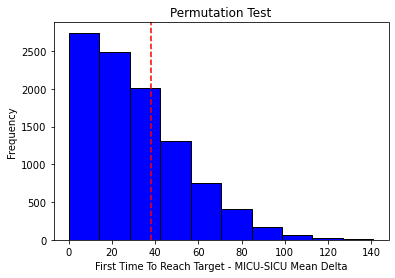

In [39]:
plt.hist(perm_deltas, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [40]:
counter = 0
for value in perm_deltas:
    if value >= abs_delta_micu_sicu:
        counter += 1
pvalue = counter / len(perm_deltas)
pvalue

0.3306

In [41]:
counter = 0
for value in perm_deltas10:
    if value >= abs_delta_sal_eicu:
        counter += 1
pvalue10 = counter / len(perm_deltas10)
pvalue10

0.0

In [42]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-SICU Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_micu_sicu.html')
fig.write_image('micu sicu target.png')



In [43]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas10

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='"First Time To Reach Target" - Mean Difference. p-value: ' + str(pvalue10),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_sal_eicu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_sal_eicu.html')
fig.write_image('sal eicu target.png')



In [44]:
counter = 0
for value in perm_deltas:
    if value >= abs_delta_micu_sicu:
        counter += 1
pvalue = counter / len(perm_deltas)
pvalue

0.3306

In [45]:
perm_deltas2 = []
for i in range(10000):
    random.shuffle(micu_med_target)
    sampled_micu_target = micu_med_target[:239]
    sampled_med_target = micu_med_target[239:]
    mean_target_sampled_micu = sum(sampled_micu_target) / len(sampled_micu_target)
    mean_target_sampled_med = sum(sampled_med_target) / len(sampled_med_target)

    delta = abs(mean_target_sampled_med - mean_target_sampled_micu)
    perm_deltas2.append(delta)

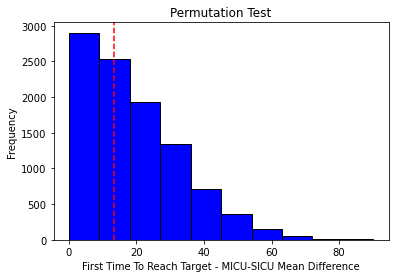

In [47]:
plt.hist(perm_deltas2, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_micu, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [48]:
counter = 0
for value in perm_deltas2:
    if value >= abs_delta_med_micu:
        counter += 1
pvalue = counter / len(perm_deltas2)
pvalue

0.5831

In [49]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas2

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-MED-surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_micu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_micu_med.html')
fig.write_image('micu med target.png')



In [50]:
abs_delta_med_micu

13.235652079102692

In [51]:
perm_deltas3 = []
for i in range(10000):
    random.shuffle(sicu_med_target)
    sampled_sicu_target = sicu_med_target[:105]
    sampled_med_target = sicu_med_target[105:]
    mean_target_sampled_sicu = sum(sampled_sicu_target) / len(sampled_sicu_target)
    mean_target_sampled_med = sum(sampled_med_target) / len(sampled_med_target)

    delta = abs(mean_target_sampled_med - mean_target_sampled_sicu)
    perm_deltas3.append(delta)

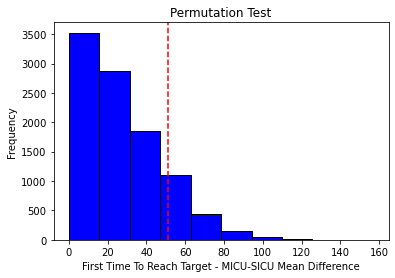

In [52]:
plt.hist(perm_deltas3, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_sicu, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Difference')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [53]:
perm_deltas3

[10.324127501163332,
 46.29052272374747,
 17.888661392895926,
 11.2722506592213,
 48.41719404374123,
 60.843640452923864,
 28.743710252830795,
 1.3712967271599155,
 43.961454940282295,
 30.625252055219505,
 31.100806576702382,
 8.78374437722971,
 21.67242128121609,
 33.40919807662476,
 32.19664960446721,
 21.954536993950683,
 33.271816348689356,
 60.23667597332093,
 69.8378237940127,
 13.960167519776633,
 12.784605242748569,
 48.978439584302805,
 67.69782844733987,
 29.439351636420042,
 10.747991313789385,
 4.159609120521168,
 23.26748099891421,
 42.40338141771366,
 38.27547696603074,
 7.398433379866617,
 72.14621529393517,
 47.1692647743136,
 20.74497440670075,
 10.882387156817117,
 61.952807507367766,
 11.388956103614078,
 37.820598728090545,
 23.463905692570222,
 86.90609585853889,
 22.605839925546775,
 40.04628509384207,
 3.066751977664012,
 72.44602140530483,
 46.50463781603844,
 0.034690553745917896,
 4.224623856057065,
 13.556979990693321,
 20.142376299053808,
 12.81263378315497

In [54]:
counter = 0
for value in perm_deltas3:
    if value >= abs_delta_med_sicu:
        counter += 1
pvalue = counter / len(perm_deltas3)
pvalue

0.1382

In [55]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas3

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='SICU-MED-surg Mean Diffrence. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_sicu, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_target_sicu_med.html')
fig.write_image('sicu med target.png')


In [56]:
perm_nor_time_micu = list(micu_first_nor_time_dict.values())
perm_nor_time_sicu = list(sicu_first_nor_time_dict.values())
perm_nor_time_med = list(med_first_nor_time_dict.values())
perm_nor_time_sal = list(sal_first_nor_time_dict.values())
perm_nor_time_eicu = list(eicu_nor_time_dict.values())


micu_sicu_nor_time = perm_nor_time_micu + perm_nor_time_sicu
micu_med_nor_time = perm_nor_time_micu + perm_nor_time_med
sicu_med_nor_time = perm_nor_time_sicu + perm_nor_time_med
sal_eicu_nor_time = perm_nor_time_sal + perm_nor_time_eicu

In [57]:
mean_nor_time_micu = sum(perm_nor_time_micu) / len(perm_nor_time_micu)
mean_nor_time_sicu = sum(perm_nor_time_sicu) / len(perm_nor_time_sicu)
mean_nor_time_med = sum(perm_nor_time_med) / len(perm_nor_time_med)
mean_nor_time_sal = sum(perm_nor_time_sal) / len(perm_nor_time_sal)
mean_nor_time_eicu = sum(perm_nor_time_eicu) / len(perm_nor_time_eicu)

In [58]:
len(perm_nor_time_sal)

12319

In [59]:
abs_delta_micu_sicu_nor_time = abs(mean_nor_time_micu - mean_nor_time_sicu)
abs_delta_micu_med_nor_time = abs(mean_nor_time_med - mean_nor_time_micu)
abs_delta_sicu_med_nor_time = abs(mean_nor_time_med - mean_nor_time_sicu)
abs_delta_sal_eicu_nor_time = abs(mean_nor_time_sal - mean_nor_time_eicu)

In [60]:
len(perm_nor_time_sicu)

106

In [61]:
perm_deltas4 = []
for i in range(10000):
    random.shuffle(micu_sicu_nor_time)
    sampled_micu_nor_time = micu_sicu_nor_time[:250]
    sampled_sicu_nor_time = micu_sicu_nor_time[250:]
    mean_nor_time_sampled_micu = sum(sampled_micu_nor_time) / len(sampled_micu_nor_time)
    mean_nor_time_sampled_sicu = sum(sampled_sicu_nor_time) / len(sampled_sicu_nor_time)
    delta = abs(mean_nor_time_sampled_micu - mean_nor_time_sampled_sicu)
    perm_deltas4.append(delta)

In [62]:
perm_deltas11 = []
for i in range(10000):
    random.shuffle(sal_eicu_nor_time)
    sampled_sal_nor_time = sal_eicu_nor_time[:12319]
    sampled_eicu_nor_time = sal_eicu_nor_time[12319:]
    mean_nor_time_sampled_sal = sum(sampled_sal_nor_time) / len(sampled_sal_nor_time)
    mean_nor_time_sampled_eicu = sum(sampled_eicu_nor_time) / len(sampled_eicu_nor_time)
    delta = abs(mean_nor_time_sampled_sal - mean_nor_time_sampled_eicu)
    perm_deltas11.append(delta)


[10.096420163974358,
 8.289920718673045,
 10.774364802337857,
 3.946537868333479,
 11.87959520523853,
 5.398463078713121,
 15.1789647428092,
 7.11891657872664,
 11.878696863922926,
 2.0257759017236197,
 1.257228671158373,
 0.435949887707352,
 2.819779744026846,
 5.509987282517528,
 0.19925318613522336,
 9.32273182347052,
 4.502946667749001,
 7.596217225424141,
 1.0890223773574803,
 14.777406174743618,
 13.23335227426469,
 9.510918094001141,
 5.619087047108792,
 15.674448683605277,
 12.287820981140243,
 4.592044808831872,
 6.914051465216346,
 3.2194983359038645,
 13.377000297643207,
 4.615975322672284,
 2.923110642097555,
 0.16623102524556543,
 11.46532997808265,
 3.171323429932073,
 1.3299618475525676,
 10.395838406797083,
 3.124945206591434,
 21.56462375192791,
 0.17015991557758525,
 14.665589739426906,
 21.497345563763304,
 5.4405985334307445,
 9.062104608058007,
 4.308991530697853,
 1.019925859783001,
 1.8560651568038509,
 6.8940498417079255,
 2.6288551559920847,
 6.048526666125497,

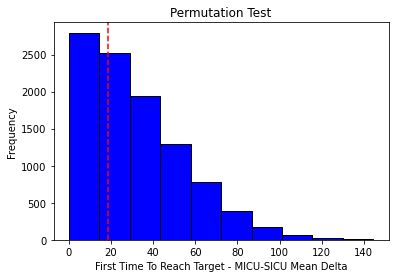

In [63]:
plt.hist(perm_deltas4, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [64]:
counter = 0
for value in perm_deltas4:
    if value >= abs_delta_micu_sicu_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas4)
pvalue

0.6504

In [65]:
counter = 0
for value in perm_deltas11:
    if value >= abs_delta_sal_eicu_nor_time:
        counter += 1
pvalue11 = counter / len(perm_deltas11)
pvalue11

0.0

In [66]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas4

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-SICU Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_time_micu_sicu.html')
fig.write_image('NOR_time_micu_sicu.png')


In [67]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas11

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='"Time At First NOR" - mean difference. p-value: ' + str(pvalue11),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_sal_eicu_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_html('perm_NOR_time_sal_eicu.html')
fig.write_image('NOR_time_sal_eicu.png')


In [68]:
perm_deltas5 = []
for i in range(10000):
    random.shuffle(micu_med_nor_time)
    sampled_micu_nor_time = micu_med_nor_time[:250]
    sampled_med_nor_time = micu_med_nor_time[250:]
    mean_nor_time_sampled_micu = sum(sampled_micu_nor_time) / len(sampled_micu_nor_time)
    mean_nor_time_sampled_med = sum(sampled_med_nor_time) / len(sampled_med_nor_time)
    delta = abs(mean_nor_time_sampled_med - mean_nor_time_sampled_micu)
    perm_deltas5.append(delta)

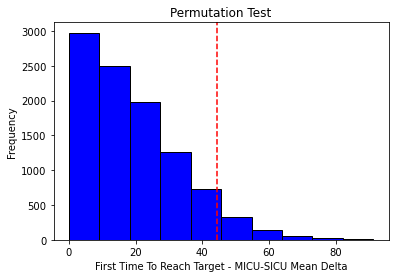

In [69]:
plt.hist(perm_deltas5, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_med_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [70]:
counter = 0
for value in perm_deltas5:
    if value >= abs_delta_micu_med_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas5)
pvalue

0.0618

In [71]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas5

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm='probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_med_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_time_micu_med.png')
fig.write_html('perm_NOR_time_micu_med.html')


In [72]:
abs_delta_micu_med_nor_time

44.31816006467261

In [73]:
perm_deltas6 = []
for i in range(10000):
    random.shuffle(sicu_med_nor_time)
    sampled_sicu_nor_time = sicu_med_nor_time[:106]
    sampled_med_nor_time = sicu_med_nor_time[106:]
    mean_nor_time_sampled_sicu = sum(sampled_sicu_nor_time) / len(sampled_sicu_nor_time)
    mean_nor_time_sampled_med = sum(sampled_med_nor_time) / len(sampled_med_nor_time)
    delta = abs(mean_nor_time_sampled_med - mean_nor_time_sampled_sicu)
    perm_deltas6.append(delta)

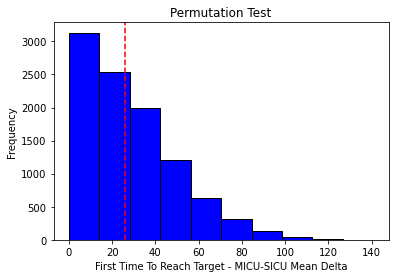

In [74]:
plt.hist(perm_deltas6, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_sicu_med_nor_time, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [75]:
counter = 0
for value in perm_deltas6:
    if value >= abs_delta_sicu_med_nor_time:
        counter += 1
pvalue = counter / len(perm_deltas6)
pvalue

0.4709

In [76]:
abs_delta_sicu_med_nor_time

25.97257515901225

In [77]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas6

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=1),  # Set the bin size to 30
        histnorm = 'probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='SICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_sicu_med_nor_time, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_time_sicu_med.png')
fig.write_html('perm_NOR_time_sicu_med.html')


In [78]:
perm_nor_map_micu = list(micu_first_nor_map_dict.values())
perm_nor_map_sicu = list(sicu_first_nor_map_dict.values())
perm_nor_map_med = list(med_first_nor_map_dict.values())
perm_nor_map_sal = list(sal_first_nor_map_dict.values())
perm_nor_map_eicu = list(eicu_nor_map_dict.values())


micu_sicu_nor_map = perm_nor_map_micu + perm_nor_map_sicu
micu_med_nor_map = perm_nor_map_micu + perm_nor_map_med
sicu_med_nor_map = perm_nor_map_sicu + perm_nor_map_med
sal_eicu_nor_map = perm_nor_map_sal + perm_nor_map_eicu

In [79]:
len(perm_nor_map_sal)

12319

In [80]:
mean_nor_map_micu = sum(perm_nor_map_micu) / len(perm_nor_map_micu)
mean_nor_map_sicu = sum(perm_nor_map_sicu) / len(perm_nor_map_sicu)
mean_nor_map_med = sum(perm_nor_map_med) / len(perm_nor_map_med)
mean_nor_map_sal = sum(perm_nor_map_sal) / len(perm_nor_map_sal)
mean_nor_map_eicu = sum(perm_nor_map_eicu) / len(perm_nor_map_eicu)


In [81]:
abs_delta_micu_sicu_nor_map = abs(mean_nor_map_micu - mean_nor_map_sicu)
abs_delta_med_micu_nor_map = abs(mean_nor_map_med - mean_nor_map_micu)
abs_delta_med_sicu_nor_map = abs(mean_nor_map_med - mean_nor_map_sicu)
abs_delta_sal_eicu_nor_map = abs(mean_nor_map_sal - mean_nor_map_eicu)

In [82]:
perm_deltas7 = []
for i in range(10000):
    random.shuffle(micu_sicu_nor_map)
    sampled_micu_nor_map = micu_sicu_nor_map[:251]
    sampled_sicu_nor_map = micu_sicu_nor_map[251:]
    mean_nor_map_sampled_micu = sum(sampled_micu_nor_map) / len(sampled_micu_nor_map)
    mean_nor_map_sampled_sicu = sum(sampled_sicu_nor_map) / len(sampled_sicu_nor_map)
    delta = abs(mean_nor_map_sampled_micu - mean_nor_map_sampled_sicu)
    perm_deltas7.append(delta)

In [83]:
perm_deltas12 = []
for i in range(10000):
    random.shuffle(sal_eicu_nor_map)
    sampled_sal_nor_map = sal_eicu_nor_map[:12319]
    sampled_eicu_nor_map = sal_eicu_nor_map[12319:]
    mean_nor_map_sampled_sal = sum(sampled_sal_nor_map) / len(sampled_sal_nor_map)
    mean_nor_map_sampled_eicu = sum(sampled_eicu_nor_map) / len(sampled_eicu_nor_map)
    delta = abs(mean_nor_map_sampled_sal - mean_nor_map_sampled_eicu)
    perm_deltas12.append(delta)
max(perm_deltas12)

1.7628791383313

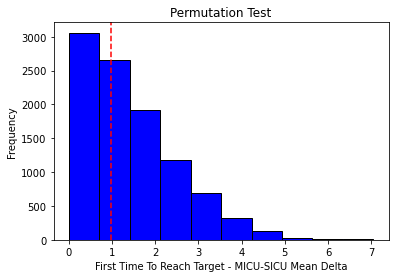

In [84]:
plt.hist(perm_deltas7, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_micu_sicu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [85]:
counter = 0
for value in perm_deltas7:
    if value >= abs_delta_micu_sicu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas7)
pvalue

0.5846

In [86]:
counter = 0
for value in perm_deltas12:
    if value >= abs_delta_sal_eicu_nor_map:
        counter += 1
pvalue12 = counter / len(perm_deltas12)
pvalue12

0.0

In [88]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas7

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.2),  # Set the bin size to 30
        histnorm = 'probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-SICU Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_micu_sicu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_MAP.png')
fig.write_html('perm_NOR_MAP_micu_sicu.html')


In [89]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas12

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.2),  # Set the bin size to 30
        histnorm = 'probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='"MAP At First NOR" - Mean Difference. p-value: ' + str(pvalue12),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_sal_eicu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_MAP_sal_eicu.png')
fig.write_html('perm_NOR_MAP_sal_eicu.html')


In [90]:
abs_delta_micu_sicu_nor_map

0.9772607682477599

In [91]:
perm_deltas8 = []
for i in range(10000):
    random.shuffle(micu_med_nor_map)
    sampled_micu_nor_map = micu_med_nor_map[:250]
    sampled_med_nor_map = micu_med_nor_map[250:]
    mean_nor_map_sampled_micu = sum(sampled_micu_nor_map) / len(sampled_micu_nor_map)
    mean_nor_map_sampled_med = sum(sampled_med_nor_map) / len(sampled_med_nor_map)
    delta = abs(mean_nor_map_sampled_med - mean_nor_map_sampled_micu)
    perm_deltas8.append(delta)

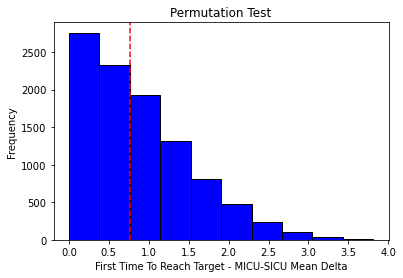

In [92]:
plt.hist(perm_deltas8, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_micu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [93]:
abs_delta_med_micu_nor_map

0.7625813386196683

In [94]:
counter = 0
for value in perm_deltas8:
    if value >= abs_delta_med_micu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas8)
pvalue

0.4914

In [95]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas8

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.1),  # Set the bin size to 30
        histnorm = 'probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='MICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_micu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_MAP_micu_med.png')
fig.write_html('perm_NOR_MAP_micu_med.html')


In [96]:
perm_deltas9 = []
for i in range(10000):
    random.shuffle(sicu_med_nor_map)
    sampled_sicu_nor_map = sicu_med_nor_map[:106]
    sampled_med_nor_map = sicu_med_nor_map[106:]
    mean_nor_map_sampled_sicu = sum(sampled_sicu_nor_map) / len(sampled_sicu_nor_map)
    mean_nor_map_sampled_med = sum(sampled_med_nor_map) / len(sampled_med_nor_map)
    delta = abs(mean_nor_map_sampled_med - mean_nor_map_sampled_sicu)
    perm_deltas9.append(delta)

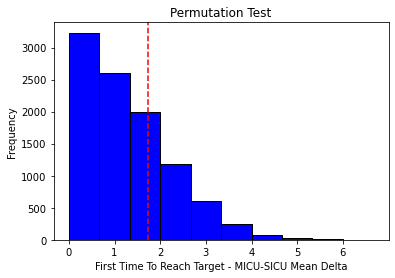

In [97]:
plt.hist(perm_deltas9, bins=10, color='blue', edgecolor='black')
plt.axvline(x=abs_delta_med_sicu_nor_map, color='red', linestyle='--', label='delta mean')
plt.xlabel('First Time To Reach Target - MICU-SICU Mean Delta')
plt.ylabel('Frequency')
plt.title('Permutation Test')
plt.show()

In [98]:
counter = 0
for value in perm_deltas9:
    if value >= abs_delta_med_sicu_nor_map:
        counter += 1
pvalue = counter / len(perm_deltas9)
pvalue

0.2844

In [99]:
# Assuming micu_first_target_dict contains your data
data_values = perm_deltas9

fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x=data_values,
        xbins=dict(size=0.1),  # Set the bin size to 30
        histnorm = 'probability',
        marker=dict(color='blue', line=dict(color='black', width=1)),
    )
)

fig.update_layout(
    xaxis_title='SICU-MED surg Mean Difference. p-value: ' + str(pvalue),
    yaxis_title='Frequency',
    title='Permutation Test',
    xaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
    yaxis=dict(title_font=dict(size=16), tickfont=dict(size=14)),
)

fig.add_vline(x=abs_delta_med_sicu_nor_map, line=dict(color='red', dash='dash'), name='Vertical Line')


# Save the histogram as an image (e.g., PNG)
fig.write_image('NOR_MAP_sicu_med.png')
fig.write_html('perm_NOR_MAP_sicu_med.html')


In [100]:
statistic, p_value = scipy.stats.mannwhitneyu(list(micu_first_target_dict.values()), list(sicu_first_target_dict.values()))
p_value

0.1640469091138511

In [101]:
micu_first_target_dict.values()

dict_values([1522, 546, 94, 80, 6, 1126, 70, 9, 9, 156, 71, 127, 22, 77, 6, 172, 6, 651, 482, 39, 17, 13, 191, 132, 136, 205, 66, 291, 136, 105, 52, 41, 1393, 183, 773, 8, 939, 128, 97, 62, 293, 665, 41, 117, 827, 489, 302, 297, 181, 76, 167, 137, 12, 297, 57, 67, 263, 397, 12, 250, 231, 692, 52, 147, 94, 23, 271, 36, 316, 101, 67, 830, 137, 747, 118, 387, 1254, 51, 142, 7, 152, 1157, 692, 193, 33, 412, 158, 125, 148, 480, 355, 200, 834, 324, 500, 324, 220, 1022, 102, 283, 1284, 70, 611, 703, 124, 330, 80, 135, 0, 27, 337, 617, 619, 490, 405, 338, 0, 21, 910, 460, 364, 65, 478, 28, 140, 95, 260, 185, 30, 503, 940, 427, 180, 517, 42, 1087, 130, 1165, 12, 191, 205, 157, 744, 934, 45, 878, 381, 444, 38, 671, 7, 512, 56, 56, 160, 238, 276, 159, 210, 93, 547, 65, 135, 238, 95, 6, 446, 679, 132, 55, 1426, 171, 96, 347, 72, 177, 368, 116, 34, 144, 24, 960, 142, 626, 752, 75, 142, 161, 573, 207, 558, 1528, 131, 228, 32, 171, 39, 122, 61, 75, 160, 15, 38, 84, 204, 304, 760, 360, 234, 382, 500, 

In [102]:
print("first time to reach target:")
first_target_dict = {"micu": micu_first_target, "sicu": sicu_first_target, "med_surg": med_surg_first_target}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_target_dict[unit1], first_target_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

first time to reach target:
micu, sicu Mann Whitney U pavlue: 0.1640469091138511
micu, med_surg Mann Whitney U pavlue: 0.4122060004420909
sicu, med_surg Mann Whitney U pavlue: 0.03164638310103364


In [103]:
print("time at first NOR:")
first_nor_time_dict = {"micu": list(micu_first_nor_time_dict.values()), "sicu": list(sicu_first_nor_time_dict.values()), "med_surg": list(med_first_nor_time_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_nor_time_dict[unit1], first_nor_time_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

time at first NOR:
micu, sicu Mann Whitney U pavlue: 1.0
micu, med_surg Mann Whitney U pavlue: 0.03553286327157833
sicu, med_surg Mann Whitney U pavlue: 0.1853980118274975


In [104]:
len(list(micu_first_nor_time_dict.values()))

250

In [105]:
len(list(sicu_first_nor_time_dict.values()))

106

In [106]:
statistic, p_value = scipy.stats.mannwhitneyu(list(micu_first_nor_time_dict.values()), list(sicu_first_nor_time_dict.values()))
p_value

1.0

In [107]:
print("MAP at first NOR:")
first_nor_map_dict = {"micu": list(micu_first_nor_map_dict.values()), "sicu": list(sicu_first_nor_map_dict.values()), "med_surg": list(med_first_nor_map_dict.values())}
pvalues = []
for unit1 in ["micu", "sicu", "med_surg"]:
    for unit2 in ["micu", "sicu", "med_surg"]:
        if unit1 != unit2:
            pvalue = scipy.stats.mannwhitneyu(first_nor_map_dict[unit1], first_nor_map_dict[unit2]).pvalue
            if pvalue not in pvalues:
                print(unit1 + ", " + unit2 + " Mann Whitney U pavlue: " + str(pvalue))
                pvalues.append(pvalue)

MAP at first NOR:
micu, sicu Mann Whitney U pavlue: 0.28589549650409096
micu, med_surg Mann Whitney U pavlue: 0.4852761486970415
sicu, med_surg Mann Whitney U pavlue: 0.07929651004517098


In [108]:
a = [1, 1]
b = [4, 4]
statistic, p_value = scipy.stats.ks_2samp(a,b)

In [109]:
statistic

1.0

In [110]:
p_value

0.3333333333333333

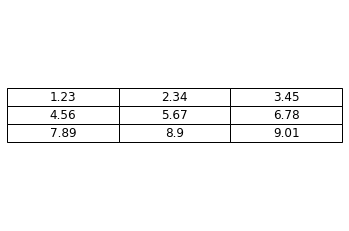

In [111]:
import matplotlib.pyplot as plt

# Create a 3x3 grid of floats (example data)
data = [[1.23, 2.34, 3.45],
        [4.56, 5.67, 6.78],
        [7.89, 8.90, 9.01]]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a table and add it to the axis
table = ax.table(cellText=data, loc='center', cellLoc='center')

# Customize the appearance of the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)  # Adjust the table size if needed

# Hide axis
ax.axis('off')

# Show the table
plt.show()


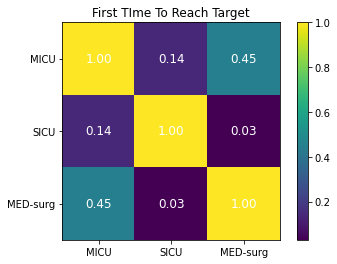

<Figure size 432x288 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.139, 0.449],
                 [0.139, 1, 0.029],
                 [0.449, 0.029, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First TIme To Reach Target')
plt.show()
plt.savefig('heatmap_with_labels.png', bbox_inches='tight')  # Adjust 'bbox_inches' to include labels


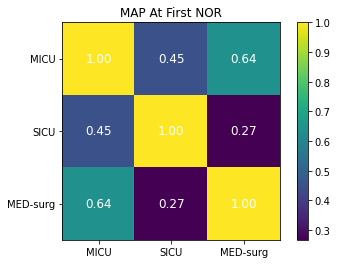

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.4502383472678779,  0.6386205055948617],
                 [0.4502383472678779, 1, 0.26709420369840464],
                 [ 0.6386205055948617, 0.26709420369840464, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('MAP At First NOR')
plt.show()


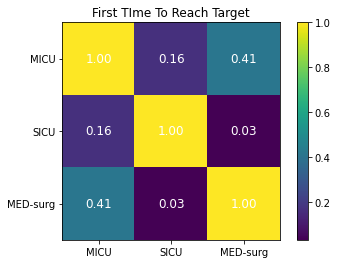

<Figure size 432x288 with 0 Axes>

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.1640469091138511, 0.4122060004420909],
                 [0.1640469091138511, 1,  0.03164638310103364],
                 [0.4122060004420909,  0.03164638310103364, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First TIme To Reach Target')
plt.show()
plt.savefig('heatmap_with_labels.png', bbox_inches='tight')  # Adjust 'bbox_inches' to include labels


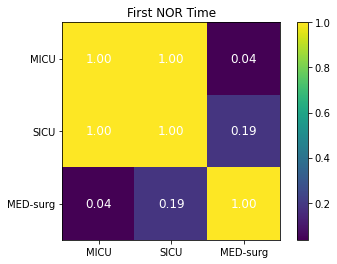

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 1, 0.03553286327157833],
                 [1, 1, 0.1853980118274975],
                 [0.03553286327157833, 0.1853980118274975, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('First NOR Time')
plt.show()


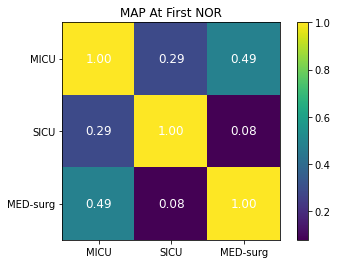

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.28589549650409096,  0.4852761486970415],
                 [0.28589549650409096, 1, 0.0792965100451709],
                 [0.4852761486970415, 0.0792965100451709, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU', 'MED-surg']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('MAP At First NOR')
plt.show()


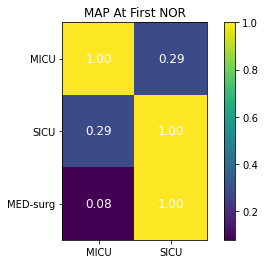

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 3x3 grid of floats with row and column labels
data = np.array([[1, 0.28589549650409096],
                 [0.28589549650409096, 1],
                 [0.0792965100451709, 1]])

row_labels = ['MICU', 'SICU', 'MED-surg']
column_labels = ['MICU', 'SICU']

# Create a heatmap
plt.imshow(data, cmap='viridis', interpolation='nearest')

# Add colorbar
plt.colorbar()

# Set axis labels using text labels
plt.xticks(range(len(column_labels)), column_labels)
plt.yticks(range(len(row_labels)), row_labels)

# Add float values as text annotations with text labels
for i in range(len(row_labels)):
    for j in range(len(column_labels)):
        plt.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color='white', fontsize=12)

# Show the heatmap with annotations and text labels
plt.title('MAP At First NOR')
plt.show()
